In [189]:
import pickle
from collections import defaultdict, Counter, deque
from random import Random


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from IPython.display import display
from sklearn.ensemble.forest import RandomForestRegressor

from importlib import reload
import state, compute_features
reload(state)
reload(compute_features)
from compute_features import compute_pair_features

%matplotlib inline


In [195]:
with open('data/molecules.p', 'rb') as fp:
    molecules = pickle.load(fp)

In [196]:
molecules_by_name = {m.name:m for m in molecules}

In [4]:
train = pd.read_csv('data/train.csv')

In [5]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [37]:
test = pd.read_csv('data/test.csv')
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [6]:

def show_molecule(molecule):
    atoms = molecule.atoms
    atoms_by_type = defaultdict(list)
    for atom in atoms:
        atoms_by_type[atom.atom_type.symbol].append(atom.position)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for atom_type, positions in sorted(atoms_by_type.items()):
        xs, ys, zs = np.array(positions).T
        ax.scatter(xs, ys, zs, marker='o', s=200, label=atom_type)
        
    bonds = {bond for atom in atoms for bond in atom.bonds}
    for bond in bonds:
        xs, ys, zs = np.array([bond.a.position, bond.b.position]).T
        ax.plot(xs, ys, zs, color='k')
        
    plt.legend(loc='upper right')
        
    return ax

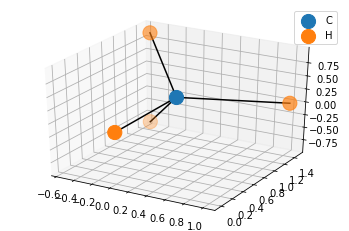

In [7]:
show_molecule(molecules[0])

In [8]:
def describe_coupling(row):
    display(row)
    molecule = molecules_by_name[row['molecule_name']]
    features = compute_pair_features(row, molecule, defaultdict(Counter))
    display(pd.Series(features))
    
describe_coupling(train.sample().iloc[0])


id                                   3982707
molecule_name               dsgdb9nsd_112546
atom_index_0                              18
atom_index_1                               4
type                                    2JHC
scalar_coupling_constant            -1.58185
Name: 3982707, dtype: object

a0_bonds              1.000000
a1_bonds              4.000000
b0_C4                 1.000000
b1_C3                 1.000000
b1_C4                 3.000000
bs0_C4-C4             1.000000
bs0_C4-H1             3.000000
bs1_C3-C4             1.000000
bs1_C3-N3             1.000000
bs1_C3-O1             1.000000
bs1_C4-C4             3.000000
bs1_C4-H1             8.000000
bs1_C4-N3             1.000000
distance              2.181253
molecular_weight    127.163200
dtype: float64

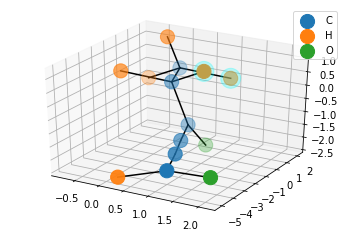

In [9]:
def show_coupling(row):
    molecule = molecules_by_name[row['molecule_name']]
    ax = show_molecule(molecule)
    positions = np.array([molecule.atoms[row['atom_index_0']].position,
                          molecule.atoms[row['atom_index_1']].position])
    xs, ys, zs = positions.T
    ax.scatter(xs, ys, zs, marker='o', s=400, color='cyan', alpha=0.25)
    return ax
    
show_coupling(train.sample().iloc[0])


In [10]:
train_sorted = train.sort_values('scalar_coupling_constant')

id                                   2359478
molecule_name               dsgdb9nsd_072293
atom_index_0                              12
atom_index_1                               3
type                                    2JHC
scalar_coupling_constant            -36.2186
Name: 2359478, dtype: object

a0_bonds              1.000000
a1_bonds              3.000000
b0_C4                 1.000000
b1_C3                 1.000000
b1_C4                 1.000000
b1_H1                 1.000000
bs0_C4-C3             1.000000
bs0_C4-C4             1.000000
bs0_C4-H1             2.000000
bs1_C3-C3             1.000000
bs1_C3-C4             2.000000
bs1_C4-C3             1.000000
bs1_C4-C4             1.000000
bs1_C4-H1             2.000000
bs1_H1-C3             1.000000
distance              2.265231
molecular_weight    119.145800
dtype: float64

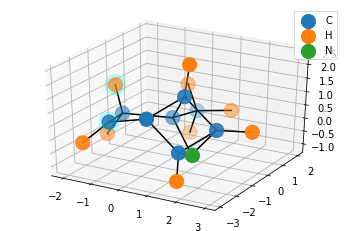

In [11]:
row = train_sorted.iloc[0]
describe_coupling(row)
show_coupling(row)

id                                    644225
molecule_name               dsgdb9nsd_020227
atom_index_0                               8
atom_index_1                               1
type                                    2JHC
scalar_coupling_constant            -36.0669
Name: 644225, dtype: object

a0_bonds              1.000000
a1_bonds              3.000000
b0_C4                 1.000000
b1_C3                 1.000000
b1_C4                 1.000000
b1_H1                 1.000000
bs0_C4-C3             1.000000
bs0_C4-C4             1.000000
bs0_C4-H1             2.000000
bs1_C3-C3             1.000000
bs1_C3-C4             2.000000
bs1_C4-C3             1.000000
bs1_C4-C4             1.000000
bs1_C4-H1             2.000000
bs1_H1-C3             1.000000
distance              2.269441
molecular_weight    105.122200
dtype: float64

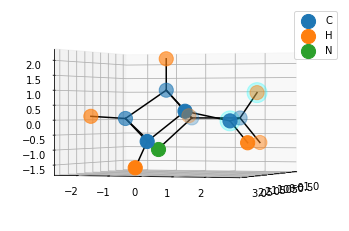

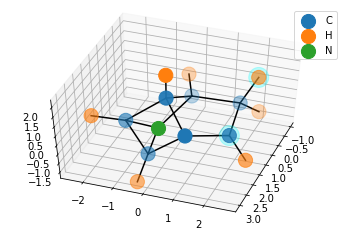

In [12]:
row = train_sorted.iloc[1]
describe_coupling(row)
show_coupling(row).view_init(elev=0., azim=20)
show_coupling(row).view_init(elev=50, azim=20)

id                                   2881820
molecule_name               dsgdb9nsd_085355
atom_index_0                              11
atom_index_1                              12
type                                    2JHH
scalar_coupling_constant            -35.1761
Name: 2881820, dtype: object

a0_bonds              1.000000
a1_bonds              1.000000
b0_C4                 1.000000
b1_C4                 1.000000
bs0_C4-C3             1.000000
bs0_C4-H1             3.000000
bs1_C4-C3             1.000000
bs1_C4-H1             3.000000
distance              1.768399
molecular_weight    125.110600
dtype: float64

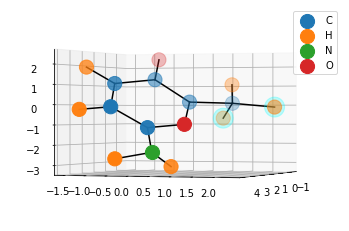

In [13]:
row = train_sorted.iloc[2]
describe_coupling(row)
show_coupling(row).view_init(elev=0., azim=20)

id                                   2138185
molecule_name               dsgdb9nsd_066740
atom_index_0                              16
atom_index_1                               7
type                                    2JHC
scalar_coupling_constant            -35.0658
Name: 2138185, dtype: object

a0_bonds              1.000000
a1_bonds              3.000000
b0_C4                 1.000000
b1_C3                 1.000000
b1_C4                 1.000000
b1_H1                 1.000000
bs0_C4-C3             1.000000
bs0_C4-C4             1.000000
bs0_C4-H1             2.000000
bs1_C3-C3             1.000000
bs1_C3-C4             2.000000
bs1_C4-C3             1.000000
bs1_C4-C4             1.000000
bs1_C4-H1             2.000000
bs1_H1-C3             1.000000
distance              2.275973
molecular_weight    119.145800
dtype: float64

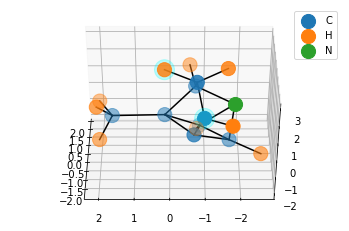

In [14]:
row = train_sorted.iloc[3]
describe_coupling(row)
show_coupling(row).view_init(elev=40., azim=180)

id                                    251687
molecule_name               dsgdb9nsd_008961
atom_index_0                               8
atom_index_1                               7
type                                    1JHC
scalar_coupling_constant              204.88
Name: 251687, dtype: object

a0_bonds              1.000000
a1_bonds              2.000000
b0_C2                 1.000000
b1_C2                 1.000000
b1_H1                 1.000000
bs0_C2-C2             1.000000
bs0_C2-H1             1.000000
bs1_C2-C2             2.000000
bs1_H1-C2             1.000000
distance              1.063044
molecular_weight    103.069600
dtype: float64

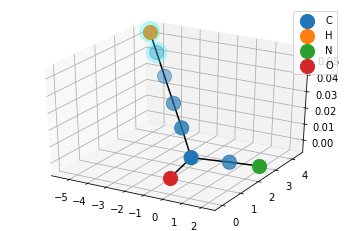

In [15]:
row = train_sorted.iloc[-1]
describe_coupling(row)
show_coupling(row)#.view_init(elev=0., azim=-90)

id                                      9390
molecule_name               dsgdb9nsd_000485
atom_index_0                               6
atom_index_1                               0
type                                    1JHC
scalar_coupling_constant             204.426
Name: 9390, dtype: object

a0_bonds             1.000000
a1_bonds             2.000000
b0_C2                1.000000
b1_C2                1.000000
b1_H1                1.000000
bs0_C2-C2            1.000000
bs0_C2-H1            1.000000
bs1_C2-C2            2.000000
bs1_H1-C2            1.000000
distance             1.062722
molecular_weight    75.061000
dtype: float64

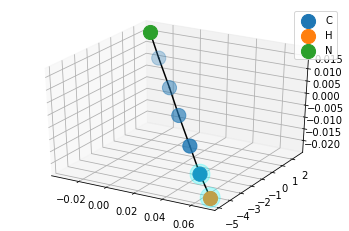

In [16]:
row = train_sorted.iloc[-2]
describe_coupling(row)
show_coupling(row)#.view_init(elev=0., azim=-90)

id                                   1308087
molecule_name               dsgdb9nsd_042352
atom_index_0                              11
atom_index_1                               8
type                                    1JHC
scalar_coupling_constant              203.84
Name: 1308087, dtype: object

a0_bonds              1.000000
a1_bonds              2.000000
b0_C2                 1.000000
b1_C2                 1.000000
b1_H1                 1.000000
bs0_C2-C2             1.000000
bs0_C2-H1             1.000000
bs1_C2-C2             2.000000
bs1_H1-C2             1.000000
distance              1.062906
molecular_weight    117.093200
dtype: float64

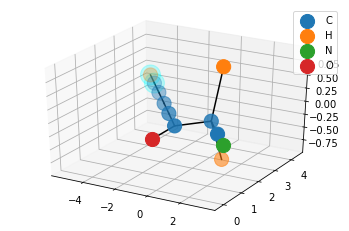

In [17]:
row = train_sorted.iloc[-3]
describe_coupling(row)
show_coupling(row)#.view_init(elev=0., azim=-90)

id                                    251860
molecule_name               dsgdb9nsd_008977
atom_index_0                               9
atom_index_1                               7
type                                    1JHC
scalar_coupling_constant             203.784
Name: 251860, dtype: object

a0_bonds              1.000000
a1_bonds              2.000000
b0_C2                 1.000000
b1_C2                 1.000000
b1_H1                 1.000000
bs0_C2-C2             1.000000
bs0_C2-H1             1.000000
bs1_C2-C2             2.000000
bs1_H1-C2             1.000000
distance              1.062767
molecular_weight    106.069600
dtype: float64

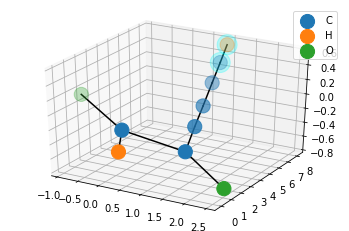

In [18]:
row = train_sorted.iloc[-4]
describe_coupling(row)
show_coupling(row)#.view_init(elev=0., azim=-90)

id                                      9456
molecule_name               dsgdb9nsd_000490
atom_index_0                               7
atom_index_1                               5
type                                    1JHC
scalar_coupling_constant             203.488
Name: 9456, dtype: object

a0_bonds             1.000000
a1_bonds             2.000000
b0_C2                1.000000
b1_C2                1.000000
b1_H1                1.000000
bs0_C2-C2            1.000000
bs0_C2-H1            1.000000
bs1_C2-C2            2.000000
bs1_H1-C2            1.000000
distance             1.062538
molecular_weight    78.061000
dtype: float64

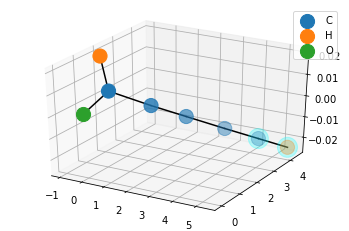

In [19]:
row = train_sorted.iloc[-5]
describe_coupling(row)
show_coupling(row)#.view_init(elev=0., azim=-90)

In [25]:
len(molecules)

130775

In [21]:
signature_count = pd.Series(Counter(m.signature for m in molecules))

In [24]:
len(signature_count)

585

In [23]:
signature_count.sort_values(ascending=False).head()

C_7,H_10,O_2        6094
C_7,H_11,N_1,O_1    5858
C_6,H_9,N_1,O_2     5630
C_7,H_9,N_1,O_1     5215
C_8,H_12,O_1        4918
dtype: int64

In [26]:
hybridized_signature_count = pd.Series(Counter(m.hybridized_signature for m in molecules))

In [27]:
len(hybridized_signature_count)

2610

In [28]:
hybridized_signature_count.sort_values(ascending=False).head()

C4_7,H1_12,O2_2         2867
C4_7,H1_10,O2_2         2260
C4_8,H1_14,O2_1         2130
C4_8,H1_12,O2_1         2106
C4_7,H1_11,N3_1,O2_1    2009
dtype: int64

In [29]:
ms = [m for m in molecules if m.hybridized_signature == 'C4_7,H1_12,O2_2']
len(ms)

2867

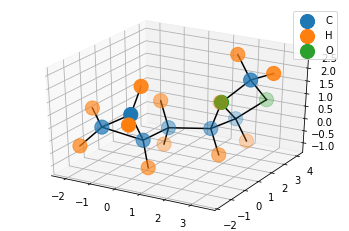

In [33]:
show_molecule(ms[0])

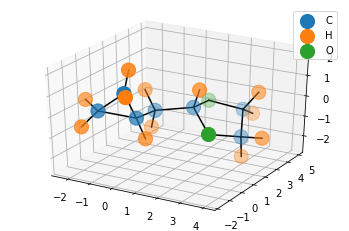

In [34]:
show_molecule(ms[1])

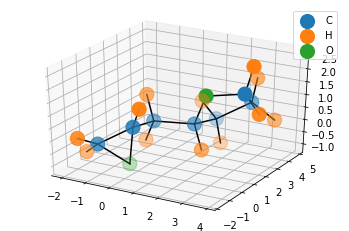

In [35]:
show_molecule(ms[2])

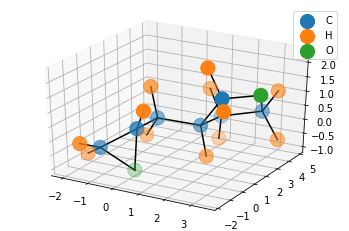

In [36]:
show_molecule(ms[3])

In [38]:
len(set(train['molecule_name']))

85003

In [39]:
len(set(test['molecule_name']))

45772

In [40]:
len(set(train['molecule_name']) & set(test['molecule_name']))

0

In [48]:
pd.concat([
    train['type'].value_counts().rename('train').div(len(train)).to_frame(),
    test['type'].value_counts().rename('test').div(len(test)).to_frame()
], axis=1).round(3)

,train,test
3JHC,0.324,0.324
2JHC,0.245,0.245
1JHC,0.152,0.152
3JHH,0.127,0.127
2JHH,0.081,0.081
3JHN,0.036,0.036
2JHN,0.026,0.026
1JHN,0.009,0.010


In [192]:
def compute_features(df:pd.DataFrame):
    features = []
    with tqdm(total=len(df)) as t:
        for _,row in df.iterrows():
            t.update()
            features.append(
                compute_pair_features(row, molecules_by_name[row['molecule_name']]))
    return pd.DataFrame(features).fillna(0.0)

In [198]:
def test_coupling_type(coupling_type: str,
                       n_train_molecules: int,
                       n_test_molecules: int):
    train_tp = train[train['type'] == coupling_type]
    print(len(train_tp), 'total labeled observations')
    
    molecule_names = list(set(train_tp['molecule_name']))
    print(len(molecule_names), 'total molecules')
    print()
    
    Random(0xCAFE).shuffle(molecule_names)
    
    molecule_names_train = molecule_names[:n_train_molecules:]
    molecule_names_test = molecule_names[n_train_molecules:
                                         n_train_molecules +
                                         n_test_molecules:]
    
    sample_train = train_tp[train_tp['molecule_name'].isin(set(molecule_names_train))]
    print(len(sample_train), 'training observations')
    assert len(sample_train) > 0
 
    sample_test = train_tp[train_tp['molecule_name'].isin(set(molecule_names_test))]
    print(len(sample_test), 'test observations')
    assert len(sample_test) > 0
    
    assert (len(set(sample_train['molecule_name']) &
                set(sample_test['molecule_name'])) == 0)
    
    features_train = compute_features(sample_train)
    y_train = sample_train['scalar_coupling_constant']
    
    model = RandomForestRegressor(
        n_estimators=50,
        criterion='mse',
        max_features='auto',
        max_depth=20,
        min_samples_split=1e-4,
        min_samples_leaf=1e-5,
        n_jobs=-1,
        verbose=10
    )
    print()
    model.fit(features_train, y_train)
    print()
    
    print('Feature importance')
    display(pd.Series(dict(zip(features_train.columns,
                               model.feature_importances_)))
            .sort_values(ascending=False)
            .head(20)
            .round(4))
    
    features_test = compute_features(sample_test)
    for missing_col in (set(features_train.columns) -
                        set(features_test.columns)):
        print('test missing col', missing_col)
        features_test[missing_col] = 0.0
    features_test = features_test[features_train.columns]
    
    y_test = sample_test['scalar_coupling_constant']
    
    y_pred = model.predict(features_test)
    
    plt.plot(y_test, y_pred, 'bo', alpha=0.1)
    plt.xlabel('$Y_{test}$')
    plt.ylabel('$Y_{pred}$')
    
    mae = np.mean(np.abs(y_test - y_pred))
    print('mae', mae)

    log_mae = np.log(mae)
    print('log mae', log_mae)
    
    return log_mae

  1%|          | 250/30318 [00:00<00:12, 2487.36it/s]

43363 observations
28560 molecules
30318 training observations
7603 test observations


100%|██████████| 30318/30318 [00:10<00:00, 2823.13it/s]



building tree 1 of 50
building tree 2 of 50building tree 3 of 50building tree 4 of 50


building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50



[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s


building tree 9 of 50building tree 10 of 50

building tree 11 of 50building tree 12 of 50

building tree 13 of 50
building tree 14 of 50building tree 15 of 50

building tree 16 of 50


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s


building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s


building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s


building tree 29 of 50
building tree 30 of 50building tree 31 of 50

building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s


building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.0s finished



Feature importance


bond_vector_dot     0.2507
a0_bond_length      0.2188
a1_bond_length      0.2025
distance            0.1346
bs0_N3-C3           0.0737
b1_N2               0.0203
bs1_N2-N3           0.0191
bs1_C3-O1           0.0163
bs0_N3-N2           0.0138
molecular_weight    0.0097
b1_H1               0.0074
b1_C3               0.0069
bs1_C4-C4           0.0064
bs1_C3-N3           0.0041
bs1_C4-H1           0.0037
bs1_C3-C3           0.0018
bs1_C3-H1           0.0017
bs1_C3-C4           0.0012
bs1_C3-N2           0.0010
bs1_C4-C2           0.0008
dtype: float64

100%|██████████| 7603/7603 [00:03<00:00, 2303.74it/s]
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


mae 1.3125654815250183
log mae 0.2719836049248711


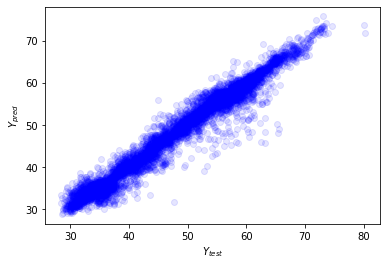

In [182]:
log_mae_1JHN = test_coupling_type('1JHN', 20_000, 5_000)

  0%|          | 0/40769 [00:00<?, ?it/s]

119253 observations
40389 molecules
40769 training observations
10217 test observations


100%|██████████| 40769/40769 [00:13<00:00, 2962.69it/s]



building tree 1 of 20
building tree 2 of 20building tree 3 of 20
building tree 4 of 20

building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s


building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.1s remaining:    0.8s



Feature importance


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.8s finished


bs0_C4-H1           0.2442
b0_C4               0.1927
bs1_H1-N2           0.1223
distance            0.1148
bs0_C3-N2           0.0716
bs0_C3-O1           0.0528
bs1_C4-C4           0.0473
molecular_weight    0.0198
bs1_C4-H1           0.0136
bs0_C3-N3           0.0125
bs0_C4-C4           0.0121
bs1_N3-N2           0.0081
b1_C3               0.0074
b1_N3               0.0066
bs0_N3-N2           0.0056
bs0_N3-H1           0.0053
bs1_C3-O1           0.0050
a1_bonds            0.0040
bs1_C4-C3           0.0040
bs0_C3-C3           0.0036
dtype: float64

100%|██████████| 10217/10217 [00:03<00:00, 2624.27it/s]
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s


test missing col bs1_O1-N2
test missing col bs0_C3-C2
test missing col b1_O1
test missing col bs0_C3-C4
mae 0.5475645492467154
log mae -0.6022749260734073


[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


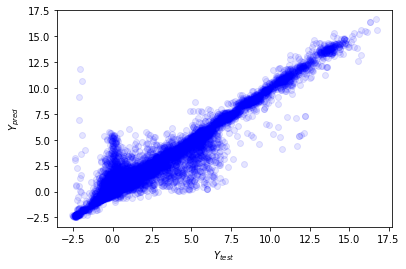

In [130]:
log_mae_2JHN = test_coupling_type('2JHN', 20_000, 5_000)

590611 observations
76892 molecules
106230 training observations


  0%|          | 185/106230 [00:00<00:57, 1841.58it/s]

26814 test observations


100%|██████████| 106230/106230 [00:31<00:00, 3381.02it/s]



building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s


building tree 17 of 20
building tree 18 of 20
building tree 19 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    5.6s remaining:    1.4s


building tree 20 of 20

Feature importance


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.7s finished


distance            0.5445
bs0_C4-C4           0.1130
bs0_C4-H1           0.0474
bs1_C4-C4           0.0271
bs1_O2-C4           0.0225
bs1_C4-H1           0.0215
bs0_O2-H1           0.0190
molecular_weight    0.0189
bs1_N3-H1           0.0180
bs1_N3-C4           0.0171
b1_O2               0.0147
bs1_O2-H1           0.0140
bs0_O2-C4           0.0118
bs0_N3-H1           0.0104
b0_O2               0.0103
bs0_N3-C3           0.0094
bs1_C3-O1           0.0083
bs1_N3-C3           0.0082
bs1_C4-N3           0.0068
b1_N3               0.0065
dtype: float64

100%|██████████| 26814/26814 [00:08<00:00, 3166.79it/s]


test missing col bs0_C3-N4
test missing col bs1_N4-C3
test missing col bs1_N4-H1
test missing col b1_N4
test missing col bs1_C3-C2
test missing col bs1_N4-C4
mae 0.7193107967339418
log mae -0.3294617521645573


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


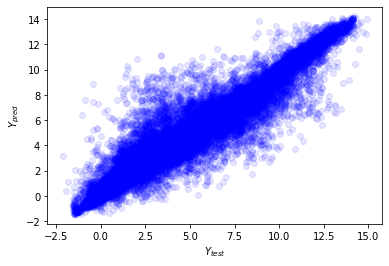

In [133]:
log_mae_3JHH = test_coupling_type('3JHH', 20_000, 5_000)

709416 total labeled observations
84747 total molecules



  0%|          | 0/418557 [00:00<?, ?it/s]

418557 training observations
83760 test observations


 40%|███▉      | 167019/418557 [01:06<01:38, 2563.38it/s]

couldn't find bond path between atoms


100%|██████████| 418557/418557 [02:52<00:00, 2431.66it/s]



building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.2s


building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.7s


building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   53.4s


building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min


building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min


building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished



Feature importance


bond_vector_dot     0.4722
distance            0.1867
bond_path_length    0.0601
a0_bond_length      0.0500
a1_bond_length      0.0350
b0_C3               0.0222
bs0_C3-H1           0.0198
bs1_H1-C4           0.0141
b0_C4               0.0134
bs1_H1-C3           0.0132
bs0_C4-H1           0.0114
a1_bonds            0.0106
b1_O2               0.0099
bs1_O2-C4           0.0091
bs1_N3-C4           0.0074
bs0_C4-O2           0.0072
bs1_C4-H1           0.0066
bs0_C2-C2           0.0050
bs1_C4-C4           0.0047
bs0_C4-N3           0.0035
dtype: float64

100%|██████████| 83760/83760 [00:33<00:00, 2476.73it/s]


test missing col bs1_N2-O1


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.4s finished


mae 2.3105134472889683
log mae 0.8374697713887062


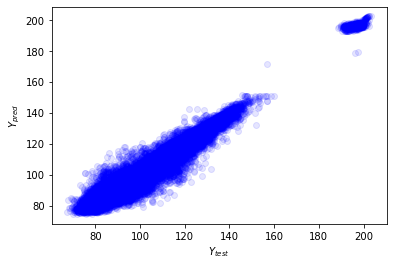

In [200]:
log_mae_1JHC = test_coupling_type('1JHC', 50_000, 10_000)

1140674 observations
84810 molecules


  0%|          | 175/216345 [00:00<02:03, 1749.88it/s]

216345 training observations
54618 test observations


100%|██████████| 216345/216345 [01:20<00:00, 2698.31it/s]



building tree 1 of 20
building tree 2 of 20building tree 3 of 20building tree 4 of 20


building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.9s


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.6s


building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   25.9s remaining:    6.5s



Feature importance


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.5s finished


bs0_C3-O1           0.3189
bs0_C4-H1           0.0989
distance            0.0784
a1_bonds            0.0546
bs0_C2-C2           0.0512
bs0_C2-H1           0.0448
bs0_C3-C3           0.0347
bs0_N2-H1           0.0332
b0_C2               0.0326
b0_N2               0.0288
bs0_C4-C2           0.0216
bs0_N2-C3           0.0204
bs0_C4-C3           0.0160
bs1_H1-C3           0.0130
b1_H1               0.0117
bs0_C3-N2           0.0088
bs1_C4-C4           0.0071
molecular_weight    0.0069
bs0_C4-C4           0.0065
bs0_N3-C3           0.0062
dtype: float64

100%|██████████| 54618/54618 [00:19<00:00, 2759.06it/s]


test missing col bs1_O1-C2
test missing col bs1_N2-N1


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


mae 0.9324513060264994
log mae -0.06993834756595067


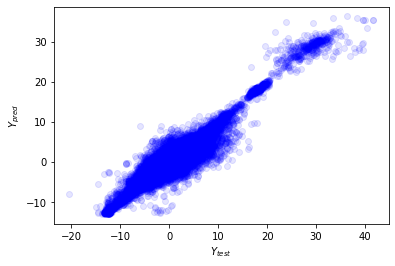

In [141]:
log_mae_2JHC = test_coupling_type('2JHC', 20_000, 5_000)

1510379 observations
84794 molecules


  0%|          | 154/266124 [00:00<02:52, 1539.52it/s]

266124 training observations
67589 test observations


100%|██████████| 266124/266124 [01:33<00:00, 2848.77it/s]



building tree 1 of 20
building tree 2 of 20building tree 3 of 20building tree 4 of 20


building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.7s


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.7s


building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   36.8s remaining:    9.2s



Feature importance


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   47.1s finished


distance            0.3486
bs0_C4-C4           0.0800
bs0_C4-H1           0.0548
bs1_C4-N3           0.0318
bs1_C4-C4           0.0301
bs1_N2-C3           0.0243
bs0_N3-C4           0.0217
bs0_N3-N2           0.0215
bs0_C4-N2           0.0214
bs0_C4-C3           0.0185
bs1_N3-C4           0.0180
bs0_N2-H1           0.0172
bs1_C4-H1           0.0169
bs1_C3-O1           0.0146
b0_N2               0.0137
bs0_N2-C3           0.0136
a1_bonds            0.0134
bs0_C4-N3           0.0132
molecular_weight    0.0128
bs1_C3-N3           0.0111
dtype: float64

100%|██████████| 67589/67589 [00:27<00:00, 2492.96it/s]


test missing col bs1_O1-C2


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


mae 0.8400251061136408
log mae -0.17432349936089728


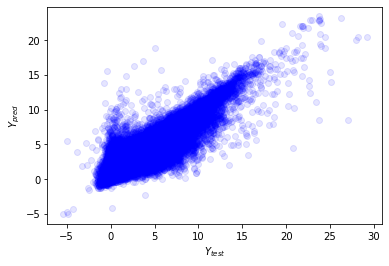

In [142]:
log_mae_3JHC = test_coupling_type('3JHC', 20_000, 5_000)

378036 observations
81254 molecules
70566 training observations
17798 test observations


100%|██████████| 70566/70566 [00:25<00:00, 2747.48it/s]



building tree 1 of 20building tree 2 of 20building tree 3 of 20
building tree 4 of 20


building tree 5 of 20
building tree 6 of 20
building tree 7 of 20building tree 8 of 20



[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s


building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.6s remaining:    0.7s



Feature importance


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.2s finished


distance            0.5674
bs1_N3-C3           0.1624
bs0_N3-C3           0.1338
bs0_C4-C3           0.0245
bs0_C4-C4           0.0205
bs1_C4-C3           0.0173
bs1_C4-C4           0.0145
molecular_weight    0.0121
bs1_C4-O2           0.0073
bs0_C4-H1           0.0071
bs0_C4-C2           0.0067
bs0_C4-O2           0.0062
bs1_C4-C2           0.0054
bs1_C4-H1           0.0047
bs1_C4-N3           0.0020
bs0_C4-N3           0.0019
bs1_C4-N2           0.0017
bs0_C4-N2           0.0012
b0_C4               0.0011
bs1_N3-C4           0.0011
dtype: float64

100%|██████████| 17798/17798 [00:06<00:00, 2861.96it/s]


test missing col bs1_C3-C2
test missing col bs0_C3-N3
test missing col bs0_C3-C2
test missing col bs1_C3-N3
mae 0.7082642507291839
log mae -0.34493801943026015


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


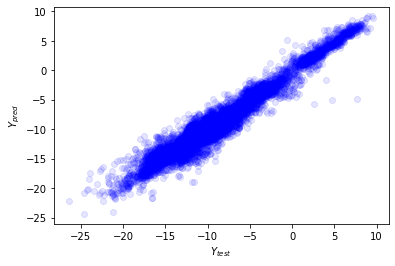

In [148]:
log_mae_2JHH = test_coupling_type('2JHH', 20_000, 5_000)

  0%|          | 0/68353 [00:00<?, ?it/s]

166415 observations
45774 molecules
68353 training observations
17072 test observations


100%|██████████| 68353/68353 [00:21<00:00, 3159.40it/s]



building tree 1 of 20building tree 2 of 20

building tree 3 of 20building tree 4 of 20

building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s


building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    4.7s remaining:    1.2s



Feature importance


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished


distance            0.3411
bs0_C4-H1           0.0846
bs0_N2-H1           0.0690
a1_bonds            0.0578
bs0_N2-C3           0.0559
bs1_N2-C3           0.0485
bs0_N3-H1           0.0382
b0_N2               0.0344
bs1_C4-C4           0.0276
molecular_weight    0.0234
bs1_C4-H1           0.0201
bs0_C3-N2           0.0200
b0_C4               0.0155
bs0_C3-C3           0.0153
bs0_C4-C4           0.0127
b1_C3               0.0112
bs1_C4-C3           0.0107
bs0_C4-C3           0.0078
bs1_C3-O1           0.0073
bs1_C3-C3           0.0070
dtype: float64

100%|██████████| 17072/17072 [00:05<00:00, 2946.71it/s]


test missing col b1_N1
test missing col bs1_N1-N2
mae 0.27652722413188924
log mae -1.28544600307676


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


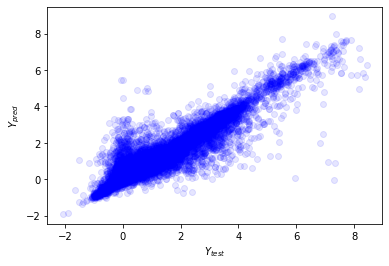

In [149]:
log_mae_3JHN = test_coupling_type('3JHN', 20_000, 5_000)

In [150]:
log_mae = pd.Series({
    '1JHN': log_mae_1JHN,
    '2JHN': log_mae_2JHN,
    '3JHH': log_mae_3JHH,
    '1JHC': log_mae_1JHC,
    '2JHC': log_mae_2JHC,
    '3JHC': log_mae_3JHC,
    '2JHH': log_mae_2JHH,
    '3JHN': log_mae_3JHN
}).sort_values()
log_mae

3JHN   -1.285446
2JHN   -0.602275
2JHH   -0.344938
3JHH   -0.329462
3JHC   -0.174323
2JHC   -0.069938
1JHN    0.275507
1JHC    0.792036
dtype: float64

In [151]:
log_mae.mean()

-0.217354942139954

In [169]:
sample_row = train[train['type'] == '1JHN'].sample(1).iloc[0]
sample_row

id                                   1673462
molecule_name               dsgdb9nsd_054367
atom_index_0                               9
atom_index_1                               0
type                                    1JHN
scalar_coupling_constant             58.4258
Name: 1673462, dtype: object

In [170]:
sample_molecule = molecules_by_name[sample_row['molecule_name']]
len(sample_molecule.atoms)

15

In [171]:
a0 = sample_molecule.atoms[sample_row['atom_index_0']]
a1 = sample_molecule.atoms[sample_row['atom_index_1']]

In [172]:
def find_shortest_path_between_atoms(atom_source, atom_target):
    bonds_to_explore = deque((atom_source, (b,))
                             for b in atom_source.bonds)
        
    while bonds_to_explore:
        prev_atom, prev_bonds = bonds_to_explore.popleft()
        next_atom = prev_bonds[-1].other(prev_atom)
        if next_atom is atom_target:
            return prev_bonds
        else:
            for next_bond in next_atom.bonds:
                if next_bond.other(next_atom) is not prev_atom:
                    bonds_to_explore.append((next_atom,
                                             prev_bonds + (next_bond,)))
    return None
            
find_shortest_path_between_atoms(a0, a1)

(<state.Bond at 0x161e02d30>,)